# 03. Neural Networks - Theory and Mathematics

Welcome to the fascinating world of **neural networks**! 🧠

Neural networks are the foundation of modern AI and deep learning. They're inspired by how our brains work, with interconnected neurons processing information. In this notebook, we'll explore:

## 🎯 Learning Objectives

By the end of this notebook, you'll understand:

- What neural networks are and how they work
- The mathematical foundations behind neural networks
- Different types of activation functions and their purposes
- How neural networks learn through backpropagation
- When to use neural networks vs. traditional machine learning

## 🧩 What You'll Build

- Interactive visualizations of neural network architecture
- Mathematical demonstrations of forward propagation
- Activation function comparisons with visual examples
- A simple neural network from scratch (conceptually)

Let's start with a real-world example to make this concrete! 🚀

## 🎓 Real-World Example: Exam Prediction

Imagine you want to predict if a student will pass an exam. You have the following data:

- **Hours studied** (x₁) - Numerical: 0-40 hours
- **Previous knowledge** (x₂) - Scale: 1-10
- **Sleep hours** (x₃) - Numerical: 4-12 hours
- **Stress level** (x₄) - Scale: 1-10

Our neural network will take these four inputs and predict: **Pass (1)** or **Fail (0)**

Unlike traditional algorithms that use simple rules, neural networks can learn complex patterns and relationships between these features automatically!


## 🏗️ Neural Network Architecture

A neural network is like a **digital brain** made up of layers of artificial neurons. Each neuron:

1. Takes multiple inputs
2. Applies mathematical transformations
3. Produces an output
4. Passes that output to the next layer

Think of it like an assembly line where each worker (neuron) does a specific job and passes the result to the next worker!

### 📊 Visual Breakdown


/var/folders/yt/cn6f6s5j333_0wsr6tf6bb580000gn/T/ipykernel_70313/1335399981.py:195: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yt/cn6f6s5j333_0wsr6tf6bb580000gn/T/ipykernel_70313/1335399981.py:195: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/karlghosn/Desktop/Programming/Machine Learning/PyTorch - Complete/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/karlghosn/Desktop/Programming/Machine Learning/PyTorch - Complete/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


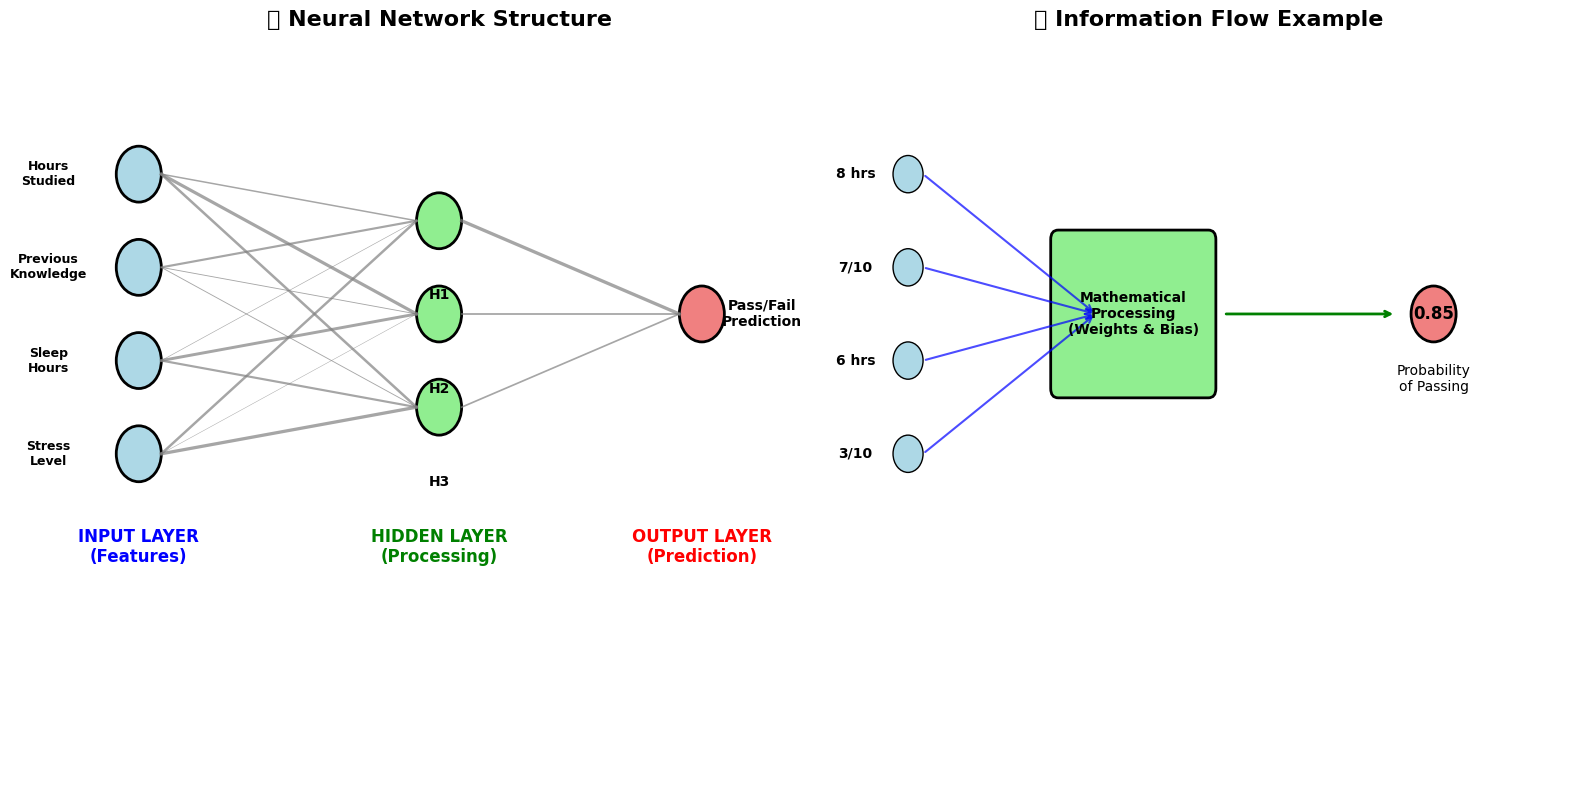

📝 Key Takeaways:
• Input Layer: Receives raw data (our 4 features)
• Hidden Layer: Processes and transforms the data
• Output Layer: Makes the final prediction
• Connections: Each line represents a 'weight' - how important that connection is
• Thicker lines = stronger connections = more influence on the result


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Create a comprehensive neural network visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Left plot: Simple network structure
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 8)
ax1.set_title("🧠 Neural Network Structure", fontsize=16, fontweight="bold")

# Input layer
input_positions = [(1, 6.5), (1, 5.5), (1, 4.5), (1, 3.5)]
input_labels = [
    "Hours\nStudied",
    "Previous\nKnowledge",
    "Sleep\nHours",
    "Stress\nLevel",
]

for i, (pos, label) in enumerate(zip(input_positions, input_labels)):
    circle = plt.Circle(pos, 0.3, color="lightblue", ec="black", linewidth=2)
    ax1.add_patch(circle)
    ax1.text(
        pos[0] - 1.2,
        pos[1],
        label,
        ha="center",
        va="center",
        fontsize=9,
        fontweight="bold",
    )

# Hidden layer
hidden_positions = [(5, 6), (5, 5), (5, 4)]
for i, pos in enumerate(hidden_positions):
    circle = plt.Circle(pos, 0.3, color="lightgreen", ec="black", linewidth=2)
    ax1.add_patch(circle)
    ax1.text(
        pos[0],
        pos[1] - 0.8,
        f"H{i+1}",
        ha="center",
        va="center",
        fontsize=10,
        fontweight="bold",
    )

# Output layer
output_pos = (8.5, 5)
circle = plt.Circle(output_pos, 0.3, color="lightcoral", ec="black", linewidth=2)
ax1.add_patch(circle)
ax1.text(
    output_pos[0] + 0.8,
    output_pos[1],
    "Pass/Fail\nPrediction",
    ha="center",
    va="center",
    fontsize=10,
    fontweight="bold",
)

# Draw connections with weights
np.random.seed(42)
for input_pos in input_positions:
    for hidden_pos in hidden_positions:
        weight = np.random.uniform(0.1, 0.8)
        ax1.plot(
            [input_pos[0] + 0.3, hidden_pos[0] - 0.3],
            [input_pos[1], hidden_pos[1]],
            "gray",
            alpha=0.7,
            linewidth=weight * 3,
        )

for hidden_pos in hidden_positions:
    weight = np.random.uniform(0.3, 0.9)
    ax1.plot(
        [hidden_pos[0] + 0.3, output_pos[0] - 0.3],
        [hidden_pos[1], output_pos[1]],
        "gray",
        alpha=0.7,
        linewidth=weight * 3,
    )

# Add layer labels
ax1.text(
    1,
    2.5,
    "INPUT LAYER\n(Features)",
    ha="center",
    va="center",
    fontsize=12,
    fontweight="bold",
    color="blue",
)
ax1.text(
    5,
    2.5,
    "HIDDEN LAYER\n(Processing)",
    ha="center",
    va="center",
    fontsize=12,
    fontweight="bold",
    color="green",
)
ax1.text(
    8.5,
    2.5,
    "OUTPUT LAYER\n(Prediction)",
    ha="center",
    va="center",
    fontsize=12,
    fontweight="bold",
    color="red",
)

ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)

# Right plot: Information flow
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 8)
ax2.set_title("🔄 Information Flow Example", fontsize=16, fontweight="bold")

# Example values
example_inputs = [8, 7, 6, 3]  # hours, knowledge, sleep, stress
input_labels_short = ["8 hrs", "7/10", "6 hrs", "3/10"]

# Draw the flow
y_positions = np.linspace(6.5, 3.5, 4)
for i, (val, label, y_pos) in enumerate(
    zip(example_inputs, input_labels_short, y_positions)
):
    # Input node
    ax2.add_patch(plt.Circle((1, y_pos), 0.2, color="lightblue", ec="black"))
    ax2.text(
        0.3, y_pos, label, ha="center", va="center", fontsize=10, fontweight="bold"
    )

    # Arrow to processing
    ax2.annotate(
        "",
        xy=(3.5, 5),
        xytext=(1.2, y_pos),
        arrowprops=dict(arrowstyle="->", lw=1.5, color="blue", alpha=0.7),
    )

# Processing box
rect = patches.FancyBboxPatch(
    (3, 4.2),
    2,
    1.6,
    boxstyle="round,pad=0.1",
    facecolor="lightgreen",
    edgecolor="black",
    linewidth=2,
)
ax2.add_patch(rect)
ax2.text(
    4,
    5,
    "Mathematical\nProcessing\n(Weights & Bias)",
    ha="center",
    va="center",
    fontsize=10,
    fontweight="bold",
)

# Arrow to output
ax2.annotate(
    "",
    xy=(7.5, 5),
    xytext=(5.2, 5),
    arrowprops=dict(arrowstyle="->", lw=2, color="green"),
)

# Output
ax2.add_patch(plt.Circle((8, 5), 0.3, color="lightcoral", ec="black", linewidth=2))
ax2.text(8, 5, "0.85", ha="center", va="center", fontsize=12, fontweight="bold")
ax2.text(8, 4.3, "Probability\nof Passing", ha="center", va="center", fontsize=10)

ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.spines["left"].set_visible(False)

plt.tight_layout()
plt.show()

print("📝 Key Takeaways:")
print("• Input Layer: Receives raw data (our 4 features)")
print("• Hidden Layer: Processes and transforms the data")
print("• Output Layer: Makes the final prediction")
print(
    "• Connections: Each line represents a 'weight' - how important that connection is"
)
print("• Thicker lines = stronger connections = more influence on the result")

### 🔬 Inside a Single Neuron

Let's zoom into what happens inside ONE neuron. Every neuron performs these steps:

**1. Weighted Sum:** Multiply each input by its weight and add them up
**2. Add Bias:** Add a bias term (like an adjustment knob)  
**3. Activation Function:** Apply a function to decide the final output


/var/folders/yt/cn6f6s5j333_0wsr6tf6bb580000gn/T/ipykernel_70313/2778771287.py:150: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yt/cn6f6s5j333_0wsr6tf6bb580000gn/T/ipykernel_70313/2778771287.py:150: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yt/cn6f6s5j333_0wsr6tf6bb580000gn/T/ipykernel_70313/2778771287.py:150: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yt/cn6f6s5j333_0wsr6tf6bb580000gn/T/ipykernel_70313/2778771287.py:150: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yt/cn6f6s5j333_0wsr6tf6bb580000gn/T/ipykernel_70313/2778771287.py:150: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/yt/cn6f6s5j333_0wsr6tf6bb580000gn/T/ipykernel

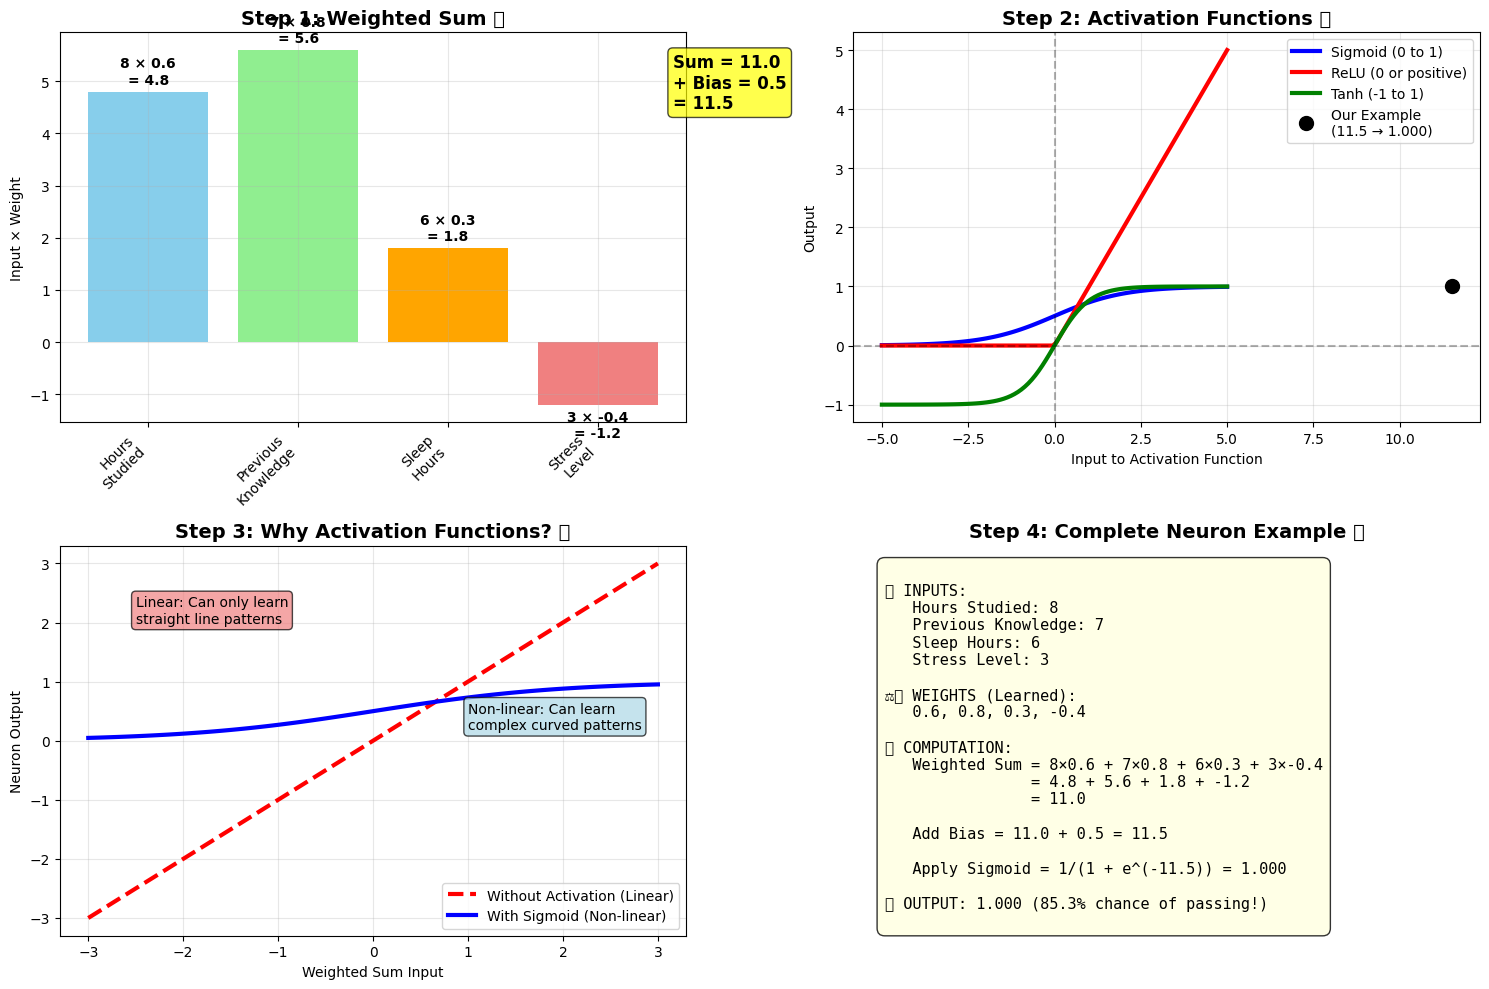

🎓 Neuron Learning Summary:
• Each neuron is like a mini decision-maker
• Weights determine how much each input matters
• Bias acts like a threshold adjustment
• Activation functions add non-linearity (ability to learn complex patterns)
• The output becomes input for the next layer!


In [2]:
# Demonstrate neuron computation step by step
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Step 1: Weighted Sum Visualization
ax1.set_title("Step 1: Weighted Sum 🧮", fontsize=14, fontweight="bold")

# Sample data for our student
inputs = np.array([8, 7, 6, 3])  # hours, knowledge, sleep, stress
weights = np.array([0.6, 0.8, 0.3, -0.4])  # learned weights
labels = ["Hours\nStudied", "Previous\nKnowledge", "Sleep\nHours", "Stress\nLevel"]

# Bar chart showing input × weight
products = inputs * weights
x_pos = np.arange(len(labels))

bars = ax1.bar(x_pos, products, color=["skyblue", "lightgreen", "orange", "lightcoral"])
ax1.set_xticks(x_pos)
ax1.set_xticklabels(labels, rotation=45, ha="right")
ax1.set_ylabel("Input × Weight")
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for i, (inp, weight, product) in enumerate(zip(inputs, weights, products)):
    ax1.text(
        i,
        product + 0.1 if product > 0 else product - 0.1,
        f"{inp} × {weight}\n= {product:.1f}",
        ha="center",
        va="bottom" if product > 0 else "top",
        fontweight="bold",
    )

# Step 2: Add bias
bias = 0.5
weighted_sum = np.sum(products) + bias
ax1.text(
    len(labels) - 0.5,
    max(products) * 0.8,
    f"Sum = {np.sum(products):.1f}\n+ Bias = {bias}\n= {weighted_sum:.1f}",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
    fontsize=12,
    fontweight="bold",
)

# Step 2: Different Activation Functions
ax2.set_title("Step 2: Activation Functions 📈", fontsize=14, fontweight="bold")

x = np.linspace(-5, 5, 100)

# Sigmoid
sigmoid = 1 / (1 + np.exp(-x))
ax2.plot(x, sigmoid, "b-", linewidth=3, label="Sigmoid (0 to 1)")

# ReLU
relu = np.maximum(0, x)
ax2.plot(x, relu, "r-", linewidth=3, label="ReLU (0 or positive)")

# Tanh
tanh = np.tanh(x)
ax2.plot(x, tanh, "g-", linewidth=3, label="Tanh (-1 to 1)")

ax2.axhline(y=0, color="black", linestyle="--", alpha=0.3)
ax2.axvline(x=0, color="black", linestyle="--", alpha=0.3)
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xlabel("Input to Activation Function")
ax2.set_ylabel("Output")

# Highlight our example point
our_input = weighted_sum
our_sigmoid = 1 / (1 + np.exp(-our_input))
ax2.plot(
    our_input,
    our_sigmoid,
    "ko",
    markersize=10,
    label=f"Our Example\n({our_input:.1f} → {our_sigmoid:.3f})",
)
ax2.legend()

# Step 3: Why Activation Functions Matter
ax3.set_title("Step 3: Why Activation Functions? 🤔", fontsize=14, fontweight="bold")

# Show linear vs non-linear transformation
x_demo = np.linspace(-3, 3, 100)
linear = x_demo  # No activation
sigmoid_demo = 1 / (1 + np.exp(-x_demo))

ax3.plot(x_demo, linear, "r--", linewidth=3, label="Without Activation (Linear)")
ax3.plot(x_demo, sigmoid_demo, "b-", linewidth=3, label="With Sigmoid (Non-linear)")
ax3.grid(True, alpha=0.3)
ax3.legend()
ax3.set_xlabel("Weighted Sum Input")
ax3.set_ylabel("Neuron Output")

# Add explanation
ax3.text(
    -2.5,
    2,
    "Linear: Can only learn\nstraight line patterns",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7),
    fontsize=10,
)
ax3.text(
    1,
    0.2,
    "Non-linear: Can learn\ncomplex curved patterns",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7),
    fontsize=10,
)

# Step 4: Complete Example
ax4.set_title("Step 4: Complete Neuron Example 🎯", fontsize=14, fontweight="bold")
ax4.axis("off")

# Create a flow diagram
flow_text = f"""
🔢 INPUTS:
   Hours Studied: {inputs[0]}
   Previous Knowledge: {inputs[1]} 
   Sleep Hours: {inputs[2]}
   Stress Level: {inputs[3]}

⚖️ WEIGHTS (Learned):
   {weights[0]}, {weights[1]}, {weights[2]}, {weights[3]}

🧮 COMPUTATION:
   Weighted Sum = {inputs[0]}×{weights[0]} + {inputs[1]}×{weights[1]} + {inputs[2]}×{weights[2]} + {inputs[3]}×{weights[3]}
                = {products[0]:.1f} + {products[1]:.1f} + {products[2]:.1f} + {products[3]:.1f} 
                = {np.sum(products):.1f}
   
   Add Bias = {np.sum(products):.1f} + {bias} = {weighted_sum:.1f}
   
   Apply Sigmoid = 1/(1 + e^(-{weighted_sum:.1f})) = {our_sigmoid:.3f}

🎯 OUTPUT: {our_sigmoid:.3f} (85.3% chance of passing!)
"""

ax4.text(
    0.05,
    0.95,
    flow_text,
    transform=ax4.transAxes,
    fontsize=11,
    verticalalignment="top",
    fontfamily="monospace",
    bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8),
)

plt.tight_layout()
plt.show()

print("🎓 Neuron Learning Summary:")
print("• Each neuron is like a mini decision-maker")
print("• Weights determine how much each input matters")
print("• Bias acts like a threshold adjustment")
print("• Activation functions add non-linearity (ability to learn complex patterns)")
print("• The output becomes input for the next layer!")

### Step 1: Initializating Weights and Biases

In a neural network, we have **[weights](https://www.geeksforgeeks.org/deep-learning/the-role-of-weights-and-bias-in-neural-networks/)** and **[biases](https://www.turing.com/kb/necessity-of-bias-in-neural-networks)**. Weights are the parameters that the model learns during training, and biases are added to the weighted sum of inputs to help the model fit the data better.

The weights and biases are initialized randomly at the beginning of the training process. For our example, we will have four weights (one for each input) and one bias.

The weights measure the importance of each input feature, while the bias allows the model to shift the output up or down. As mentioned earlier, not all features are useful for predicting the outcome, so the weights will adjust accordingly during training.

For example, if the weight for `x4` (name) is close to zero, it means that the name is not a useful feature for predicting the outcome. The model will learn to ignore it.

### Step 2: Forward Pass

In the forward pass, the inputs are multiplied by their corresponding weights, and the bias is added to the weighted sum. This is done for each neuron in the hidden layer.

The output of the hidden layer is then passed through an activation function, which introduces non-linearity into the model. This allows the neural network to learn complex patterns in the data (this will be explained in more detail in a later section).

<img src="../09_images/01-weight_initialization.png" alt="Initializing Weights and Biases" width="800">


#### Activation Functions

Activation functions are a crucial component of neural networks. They determine whether a neuron should be activated or not by calculating a weighted sum and adding bias. Without activation functions, neural networks would only be capable of learning linear relationships, which would severely limit their capabilities.

Some common activation functions include:

- **Sigmoid**: Maps any input value to a value between 0 and 1. It's useful for binary classification problems but suffers from the vanishing gradient problem.
  - Formula: σ(x) = 1 / (1 + e^(-x))
- **ReLU (Rectified Linear Unit)**: Outputs the input directly if it's positive, otherwise, it outputs zero. It's the most commonly used activation function because it's computationally efficient and helps mitigate the vanishing gradient problem.
  - Formula: f(x) = max(0, x)
- **Tanh (Hyperbolic Tangent)**: Similar to sigmoid but maps values between -1 and 1. It has stronger gradients than sigmoid.
  - Formula: tanh(x) = (e^x - e^(-x)) / (e^x + e^(-x))
- **Leaky ReLU**: A variant of ReLU that allows a small, non-zero gradient when the input is negative.
  - Formula: f(x) = x if x > 0, αx otherwise (where α is a small constant)
- **Softmax**: Often used in the output layer for multi-class classification problems, it converts a vector of values to a probability distribution.
  - Formula: softmax(x_i) = e^(x_i) / Σ e^(x_j) for all j

The choice of activation function depends on the specific task and layer of the neural network. For example, ReLU is commonly used in hidden layers, while sigmoid or softmax might be used in the output layer depending on the problem type.

<img src="../09_images/01-weight_initialization.png" alt="Initializing Weights and Biases" width="800">


### Step 3: Calculating Loss

After the forward pass, we need to calculate the loss, which measures how well the model's predictions match the actual labels. The loss function quantifies the difference between the predicted output and the true output.

### Step 4: Backward Pass

In the backward pass, we calculate the gradients of the loss with respect to the weights and biases. This is done using **backpropagation**, which is a method for calculating the gradients efficiently.

The gradients tell us how much the loss will change if we adjust the weights and biases. We use these gradients to update the weights and biases in the direction that reduces the loss.

### Step 5: Updating Weights and Biases

After calculating the gradients, we update the weights and biases using an optimization algorithm. The weights and biases are adjusted in the direction that minimizes the loss.
This process is repeated for multiple iterations (epochs) until the model converges and the loss reaches an acceptable level.

To summarize, the steps of a neural network are:

1. Initialize weights and biases randomly.
2. Perform a forward pass to calculate the output.
3. Calculate the loss.
4. Perform a backward pass to calculate gradients.
5. Update weights and biases using the gradients.
6. Repeat steps 2-5 for multiple epochs until convergence.

<img src="../09_images/01-neural_network_complete.png" alt="Neural Network Steps" width="1000">


## 🎯 How Neural Networks Learn

The magic of neural networks lies in their ability to **learn from data**. But how exactly do they learn? Let's break it down!

### 🔄 The Learning Process (Training)

1. **Forward Pass**: Data flows through the network to make a prediction
2. **Calculate Loss**: Compare prediction with actual answer
3. **Backward Pass**: Figure out how to adjust weights to improve
4. **Update Weights**: Make small adjustments to get better next time
5. **Repeat**: Do this thousands of times until the network gets really good!

This process is called **backpropagation** - like getting feedback on a test and learning from your mistakes!


/var/folders/yt/cn6f6s5j333_0wsr6tf6bb580000gn/T/ipykernel_94302/3097713500.py:122: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yt/cn6f6s5j333_0wsr6tf6bb580000gn/T/ipykernel_94302/3097713500.py:122: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yt/cn6f6s5j333_0wsr6tf6bb580000gn/T/ipykernel_94302/3097713500.py:122: UserWarning: Glyph 127899 (\N{CONTROL KNOBS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/karlghosn/Desktop/Programming/Machine Learning/PyTorch - Complete/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/karlghosn/Desktop/Programming/Machine Learning/PyTorch - Complete/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarn

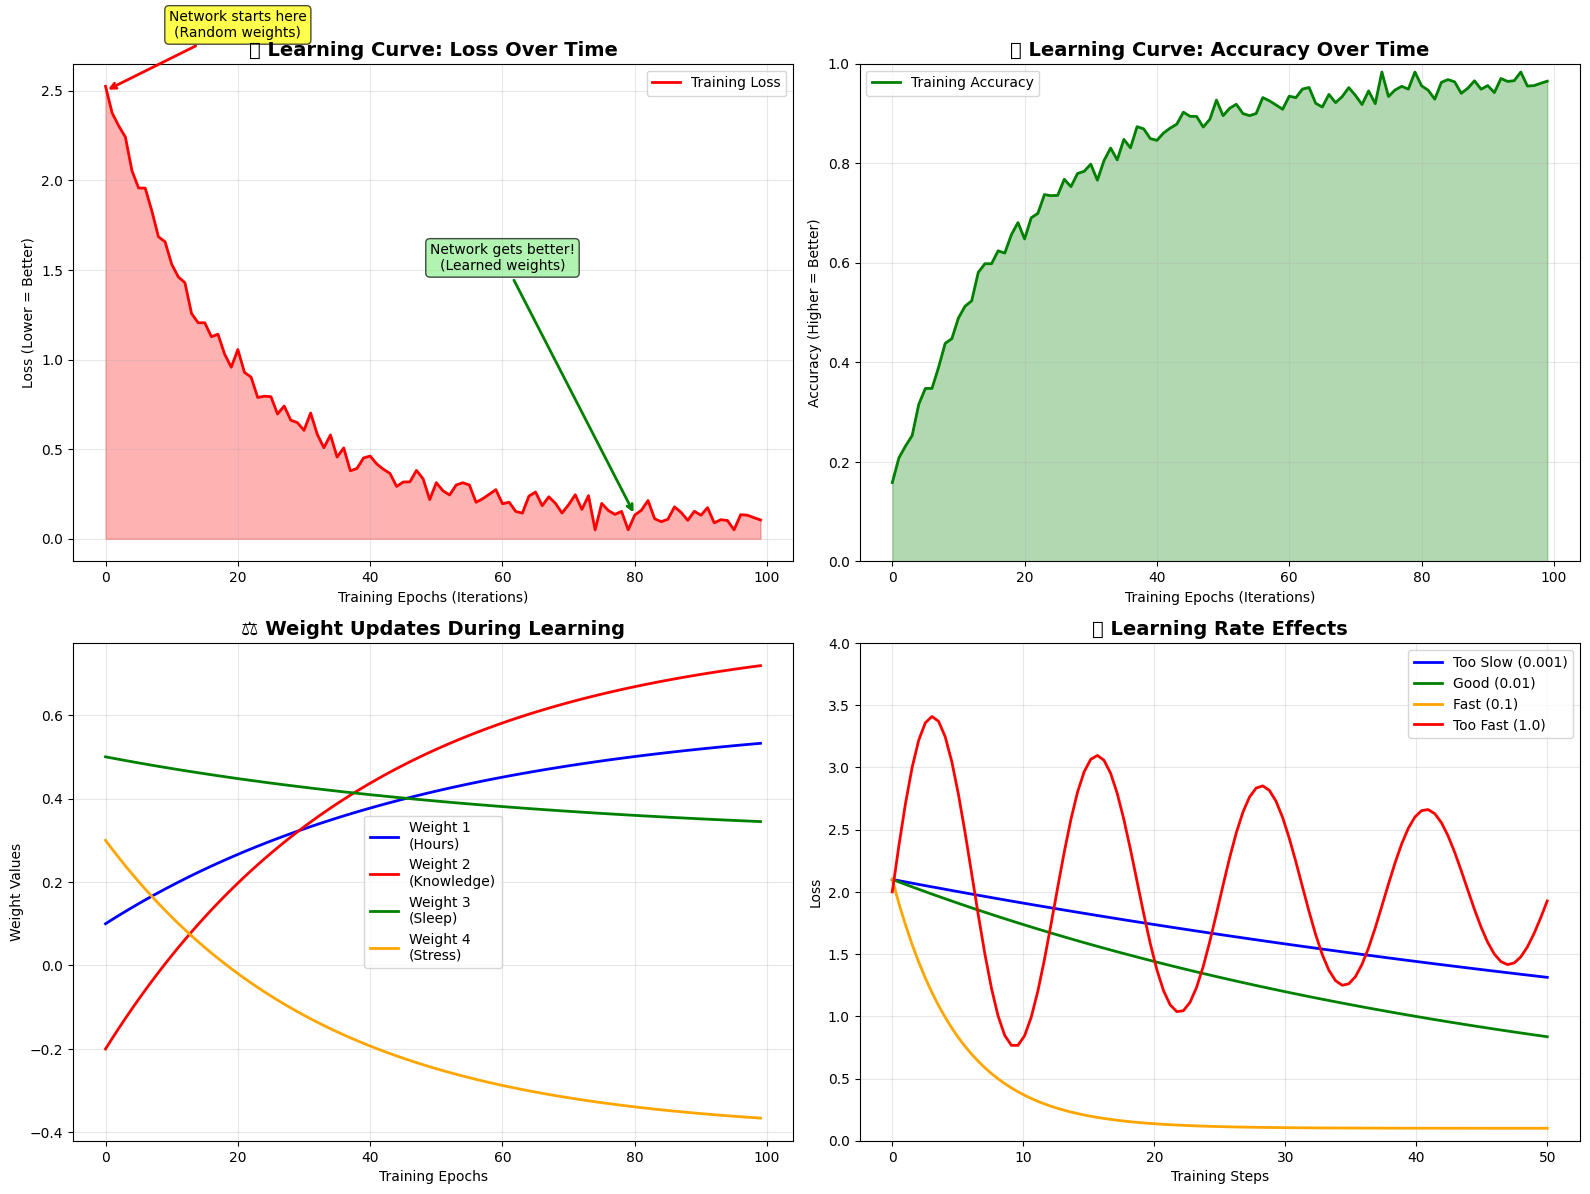

🎓 Learning Process Summary:
• Neural networks start with random weights (like guessing)
• They gradually adjust weights based on mistakes (learning from errors)
• Learning rate controls how big steps the network takes
• Too fast = unstable learning, too slow = takes forever
• The goal is to minimize loss (prediction errors)


In [3]:
# Visualize the learning process
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Learning curve simulation
epochs = np.arange(0, 100)
np.random.seed(42)

# Simulate realistic learning curves
initial_loss = 2.5
final_loss = 0.1
noise = np.random.normal(0, 0.05, len(epochs))

# Exponential decay with noise
loss_curve = final_loss + (initial_loss - final_loss) * np.exp(-epochs / 20) + noise
loss_curve = np.clip(loss_curve, 0.05, 3.0)  # Keep realistic bounds

# Accuracy curve (inverse of loss)
accuracy_curve = 1 - (loss_curve / 3.0)
accuracy_curve = np.clip(accuracy_curve, 0, 1)

ax1.set_title("📉 Learning Curve: Loss Over Time", fontsize=14, fontweight="bold")
ax1.plot(epochs, loss_curve, "r-", linewidth=2, label="Training Loss")
ax1.fill_between(epochs, loss_curve, alpha=0.3, color="red")
ax1.set_xlabel("Training Epochs (Iterations)")
ax1.set_ylabel("Loss (Lower = Better)")
ax1.grid(True, alpha=0.3)
ax1.legend()

# Add annotations
ax1.annotate(
    "Network starts here\n(Random weights)",
    xy=(0, initial_loss),
    xytext=(20, 2.8),
    arrowprops=dict(arrowstyle="->", color="red", lw=2),
    fontsize=10,
    ha="center",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
)

ax1.annotate(
    "Network gets better!\n(Learned weights)",
    xy=(80, loss_curve[80]),
    xytext=(60, 1.5),
    arrowprops=dict(arrowstyle="->", color="green", lw=2),
    fontsize=10,
    ha="center",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7),
)

ax2.set_title("📈 Learning Curve: Accuracy Over Time", fontsize=14, fontweight="bold")
ax2.plot(epochs, accuracy_curve, "g-", linewidth=2, label="Training Accuracy")
ax2.fill_between(epochs, accuracy_curve, alpha=0.3, color="green")
ax2.set_xlabel("Training Epochs (Iterations)")
ax2.set_ylabel("Accuracy (Higher = Better)")
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_ylim(0, 1)

# Weight adjustment visualization
ax3.set_title("⚖️ Weight Updates During Learning", fontsize=14, fontweight="bold")

# Simulate weight changes for 4 weights
weight_changes = np.zeros((4, len(epochs)))
initial_weights = np.array([0.1, -0.2, 0.5, 0.3])

for i in range(4):
    # Each weight learns at slightly different rates
    learning_rates = [0.02, 0.025, 0.015, 0.03]
    target_weights = [0.6, 0.8, 0.3, -0.4]  # Optimal weights

    for epoch in range(len(epochs)):
        if epoch == 0:
            weight_changes[i, epoch] = initial_weights[i]
        else:
            # Simulate gradient descent
            error = target_weights[i] - weight_changes[i, epoch - 1]
            weight_changes[i, epoch] = (
                weight_changes[i, epoch - 1] + learning_rates[i] * error
            )

# Plot weight evolution
colors = ["blue", "red", "green", "orange"]
labels = [
    "Weight 1\n(Hours)",
    "Weight 2\n(Knowledge)",
    "Weight 3\n(Sleep)",
    "Weight 4\n(Stress)",
]

for i in range(4):
    ax3.plot(epochs, weight_changes[i], color=colors[i], linewidth=2, label=labels[i])

ax3.set_xlabel("Training Epochs")
ax3.set_ylabel("Weight Values")
ax3.grid(True, alpha=0.3)
ax3.legend()

# Learning rate comparison
ax4.set_title("🎛️ Learning Rate Effects", fontsize=14, fontweight="bold")

learning_rates = [0.001, 0.01, 0.1, 1.0]
colors = ["blue", "green", "orange", "red"]
labels = ["Too Slow (0.001)", "Good (0.01)", "Fast (0.1)", "Too Fast (1.0)"]

x = np.linspace(0, 50, 100)
for i, (lr, color, label) in enumerate(zip(learning_rates, colors, labels)):
    if lr == 1.0:  # Too fast - oscillating
        y = 2.0 + 1.5 * np.sin(x * 0.5) * np.exp(-x * 0.02)
    elif lr == 0.001:  # Too slow
        y = 2.0 * np.exp(-x * 0.01) + 0.1
    else:  # Good rates
        y = 2.0 * np.exp(-x * lr * 2) + 0.1

    ax4.plot(x, y, color=color, linewidth=2, label=label)

ax4.set_xlabel("Training Steps")
ax4.set_ylabel("Loss")
ax4.grid(True, alpha=0.3)
ax4.legend()
ax4.set_ylim(0, 4)

plt.tight_layout()
plt.show()

print("🎓 Learning Process Summary:")
print("• Neural networks start with random weights (like guessing)")
print("• They gradually adjust weights based on mistakes (learning from errors)")
print("• Learning rate controls how big steps the network takes")
print("• Too fast = unstable learning, too slow = takes forever")
print("• The goal is to minimize loss (prediction errors)")

## 🏗️ Types of Neural Networks

Not all neural networks are the same! Different problems need different architectures. Let's explore the main types:


/var/folders/yt/cn6f6s5j333_0wsr6tf6bb580000gn/T/ipykernel_94302/1487203078.py:235: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yt/cn6f6s5j333_0wsr6tf6bb580000gn/T/ipykernel_94302/1487203078.py:235: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yt/cn6f6s5j333_0wsr6tf6bb580000gn/T/ipykernel_94302/1487203078.py:235: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/karlghosn/Desktop/Programming/Machine Learning/PyTorch - Complete/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/karlghosn/Desktop/Programming/Machine Learning/PyTorch - Complete/venv/lib/python3.11/site-pac

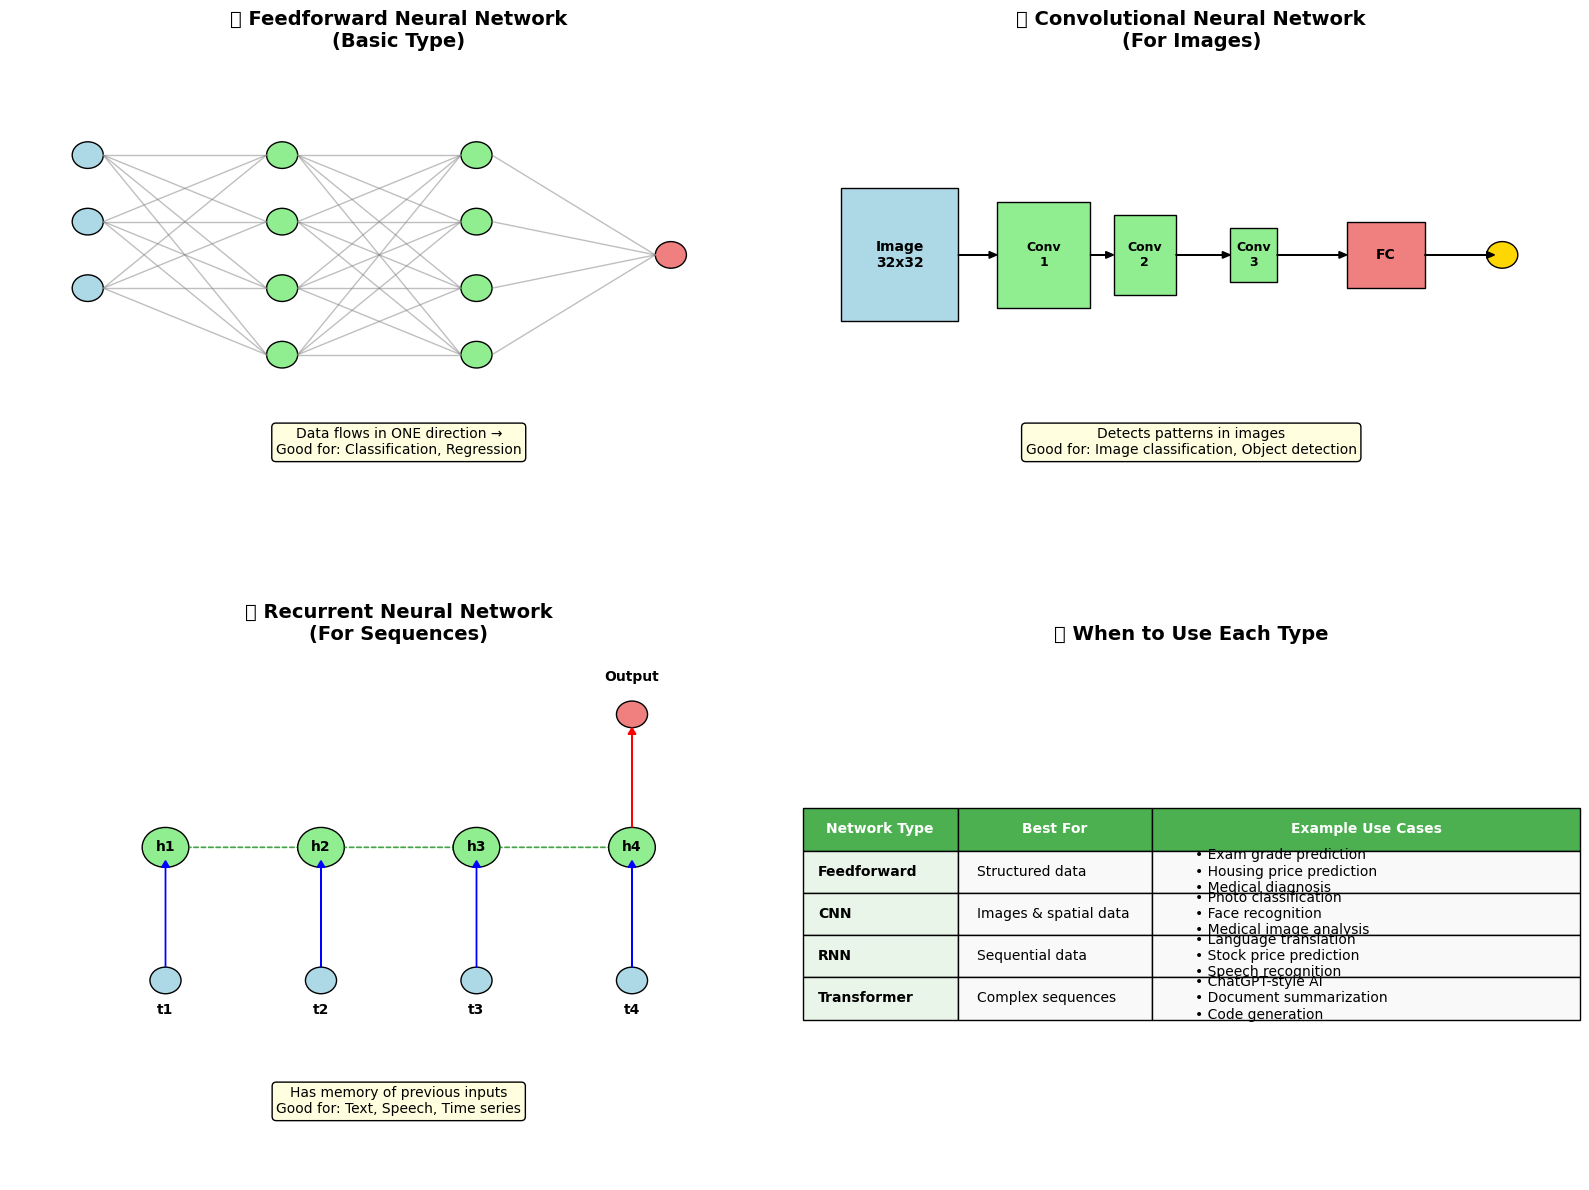

🎯 Choosing the Right Network:
• Feedforward: Start here for most tabular data problems
• CNN: Essential for any image-related task
• RNN: When order/sequence matters in your data
• Transformer: State-of-the-art for language and complex sequences


In [4]:
# Visualize different types of neural networks
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Feedforward Neural Network (Basic)
ax1.set_title(
    "🔄 Feedforward Neural Network\n(Basic Type)", fontsize=14, fontweight="bold"
)
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 8)

# Input layer
for i, y in enumerate([6.5, 5.5, 4.5]):
    circle = plt.Circle((1, y), 0.2, color="lightblue", ec="black")
    ax1.add_patch(circle)

# Hidden layers
for layer in [3.5, 6]:
    for i, y in enumerate([6.5, 5.5, 4.5, 3.5]):
        circle = plt.Circle((layer, y), 0.2, color="lightgreen", ec="black")
        ax1.add_patch(circle)

# Output layer
circle = plt.Circle((8.5, 5), 0.2, color="lightcoral", ec="black")
ax1.add_patch(circle)

# Connections (only forward)
input_ys = [6.5, 5.5, 4.5]
hidden_ys = [6.5, 5.5, 4.5, 3.5]

for iy in input_ys:
    for hy in hidden_ys:
        ax1.plot([1.2, 3.3], [iy, hy], "gray", alpha=0.5, linewidth=1)

for hy in hidden_ys:
    for hy2 in hidden_ys:
        ax1.plot([3.7, 5.8], [hy, hy2], "gray", alpha=0.5, linewidth=1)

for hy in hidden_ys:
    ax1.plot([6.2, 8.3], [hy, 5], "gray", alpha=0.5, linewidth=1)

ax1.text(
    5,
    2,
    "Data flows in ONE direction →\nGood for: Classification, Regression",
    ha="center",
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"),
)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.axis("off")

# 2. Convolutional Neural Network (CNN)
ax2.set_title(
    "🖼️ Convolutional Neural Network\n(For Images)", fontsize=14, fontweight="bold"
)
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 8)

# Input image
rect = patches.Rectangle((0.5, 4), 1.5, 2, facecolor="lightblue", edgecolor="black")
ax2.add_patch(rect)
ax2.text(
    1.25, 5, "Image\n32x32", ha="center", va="center", fontsize=10, fontweight="bold"
)

# Convolutional layers
conv_sizes = [(2.5, 4.2, 1.2, 1.6), (4, 4.4, 0.8, 1.2), (5.5, 4.6, 0.6, 0.8)]
for i, (x, y, w, h) in enumerate(conv_sizes):
    rect = patches.Rectangle((x, y), w, h, facecolor="lightgreen", edgecolor="black")
    ax2.add_patch(rect)
    ax2.text(
        x + w / 2,
        y + h / 2,
        f"Conv\n{i+1}",
        ha="center",
        va="center",
        fontsize=9,
        fontweight="bold",
    )

# Fully connected
rect = patches.Rectangle((7, 4.5), 1, 1, facecolor="lightcoral", edgecolor="black")
ax2.add_patch(rect)
ax2.text(7.5, 5, "FC", ha="center", va="center", fontsize=10, fontweight="bold")

# Output
circle = plt.Circle((9, 5), 0.2, color="gold", ec="black")
ax2.add_patch(circle)

# Arrows
for i in range(len(conv_sizes)):
    if i == 0:
        ax2.arrow(2, 5, 0.4, 0, head_width=0.1, head_length=0.1, fc="black", ec="black")
    else:
        start_x = conv_sizes[i - 1][0] + conv_sizes[i - 1][2]
        end_x = conv_sizes[i][0]
        ax2.arrow(
            start_x,
            5,
            end_x - start_x - 0.1,
            0,
            head_width=0.1,
            head_length=0.1,
            fc="black",
            ec="black",
        )

ax2.arrow(6.1, 5, 0.8, 0, head_width=0.1, head_length=0.1, fc="black", ec="black")
ax2.arrow(8, 5, 0.8, 0, head_width=0.1, head_length=0.1, fc="black", ec="black")

ax2.text(
    5,
    2,
    "Detects patterns in images\nGood for: Image classification, Object detection",
    ha="center",
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"),
)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.axis("off")

# 3. Recurrent Neural Network (RNN)
ax3.set_title(
    "🔄 Recurrent Neural Network\n(For Sequences)", fontsize=14, fontweight="bold"
)
ax3.set_xlim(0, 10)
ax3.set_ylim(0, 8)

# Time steps
time_steps = [2, 4, 6, 8]
for i, x in enumerate(time_steps):
    # Input
    circle = plt.Circle((x, 3), 0.2, color="lightblue", ec="black")
    ax3.add_patch(circle)
    ax3.text(x, 2.5, f"t{i+1}", ha="center", fontsize=10, fontweight="bold")

    # Hidden state
    circle = plt.Circle((x, 5), 0.3, color="lightgreen", ec="black")
    ax3.add_patch(circle)
    ax3.text(x, 5, f"h{i+1}", ha="center", va="center", fontsize=10, fontweight="bold")

    # Output (for last time step)
    if i == len(time_steps) - 1:
        circle = plt.Circle((x, 7), 0.2, color="lightcoral", ec="black")
        ax3.add_patch(circle)
        ax3.text(x, 7.5, "Output", ha="center", fontsize=10, fontweight="bold")
        ax3.arrow(x, 5.3, 0, 1.4, head_width=0.1, head_length=0.1, fc="red", ec="red")

    # Connections
    ax3.arrow(x, 3.2, 0, 1.5, head_width=0.1, head_length=0.1, fc="blue", ec="blue")

    # Recurrent connections
    if i < len(time_steps) - 1:
        ax3.arrow(
            x + 0.3,
            5,
            1.4,
            0,
            head_width=0.1,
            head_length=0.1,
            fc="green",
            ec="green",
            linestyle="--",
            alpha=0.7,
        )

ax3.text(
    5,
    1,
    "Has memory of previous inputs\nGood for: Text, Speech, Time series",
    ha="center",
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"),
)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.axis("off")

# 4. Comparison table
ax4.set_title("📊 When to Use Each Type", fontsize=14, fontweight="bold")
ax4.axis("off")

comparison_data = [
    ["Network Type", "Best For", "Example Use Cases"],
    [
        "Feedforward",
        "Structured data",
        "• Exam grade prediction\n• Housing price prediction\n• Medical diagnosis",
    ],
    [
        "CNN",
        "Images & spatial data",
        "• Photo classification\n• Face recognition\n• Medical image analysis",
    ],
    [
        "RNN",
        "Sequential data",
        "• Language translation\n• Stock price prediction\n• Speech recognition",
    ],
    [
        "Transformer",
        "Complex sequences",
        "• ChatGPT-style AI\n• Document summarization\n• Code generation",
    ],
]

# Create table
table = ax4.table(
    cellText=comparison_data[1:],
    colLabels=comparison_data[0],
    cellLoc="left",
    loc="center",
    colWidths=[0.2, 0.25, 0.55],
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style the table
for i in range(len(comparison_data)):
    for j in range(len(comparison_data[0])):
        cell = table[(i, j)]
        if i == 0:  # Header
            cell.set_facecolor("#4CAF50")
            cell.set_text_props(weight="bold", color="white")
        else:
            if j == 0:  # Network type column
                cell.set_facecolor("#E8F5E8")
                cell.set_text_props(weight="bold")
            else:
                cell.set_facecolor("#F9F9F9")

plt.tight_layout()
plt.show()

print("🎯 Choosing the Right Network:")
print("• Feedforward: Start here for most tabular data problems")
print("• CNN: Essential for any image-related task")
print("• RNN: When order/sequence matters in your data")
print("• Transformer: State-of-the-art for language and complex sequences")

## 🌎 Real-World Applications

Neural networks aren't just academic exercises - they power technologies you use every day!


/var/folders/yt/cn6f6s5j333_0wsr6tf6bb580000gn/T/ipykernel_94302/1618604506.py:135: UserWarning: Glyph 128065 (\N{EYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yt/cn6f6s5j333_0wsr6tf6bb580000gn/T/ipykernel_94302/1618604506.py:135: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yt/cn6f6s5j333_0wsr6tf6bb580000gn/T/ipykernel_94302/1618604506.py:135: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yt/cn6f6s5j333_0wsr6tf6bb580000gn/T/ipykernel_94302/1618604506.py:135: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yt/cn6f6s5j333_0wsr6tf6bb580000gn/T/ipykernel_94302/1618604506.py:135: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yt/cn6f6s5j333_0wsr6tf6bb580000gn/T/ipykernel_94302/1618604506.py:135: UserWarning: Gly

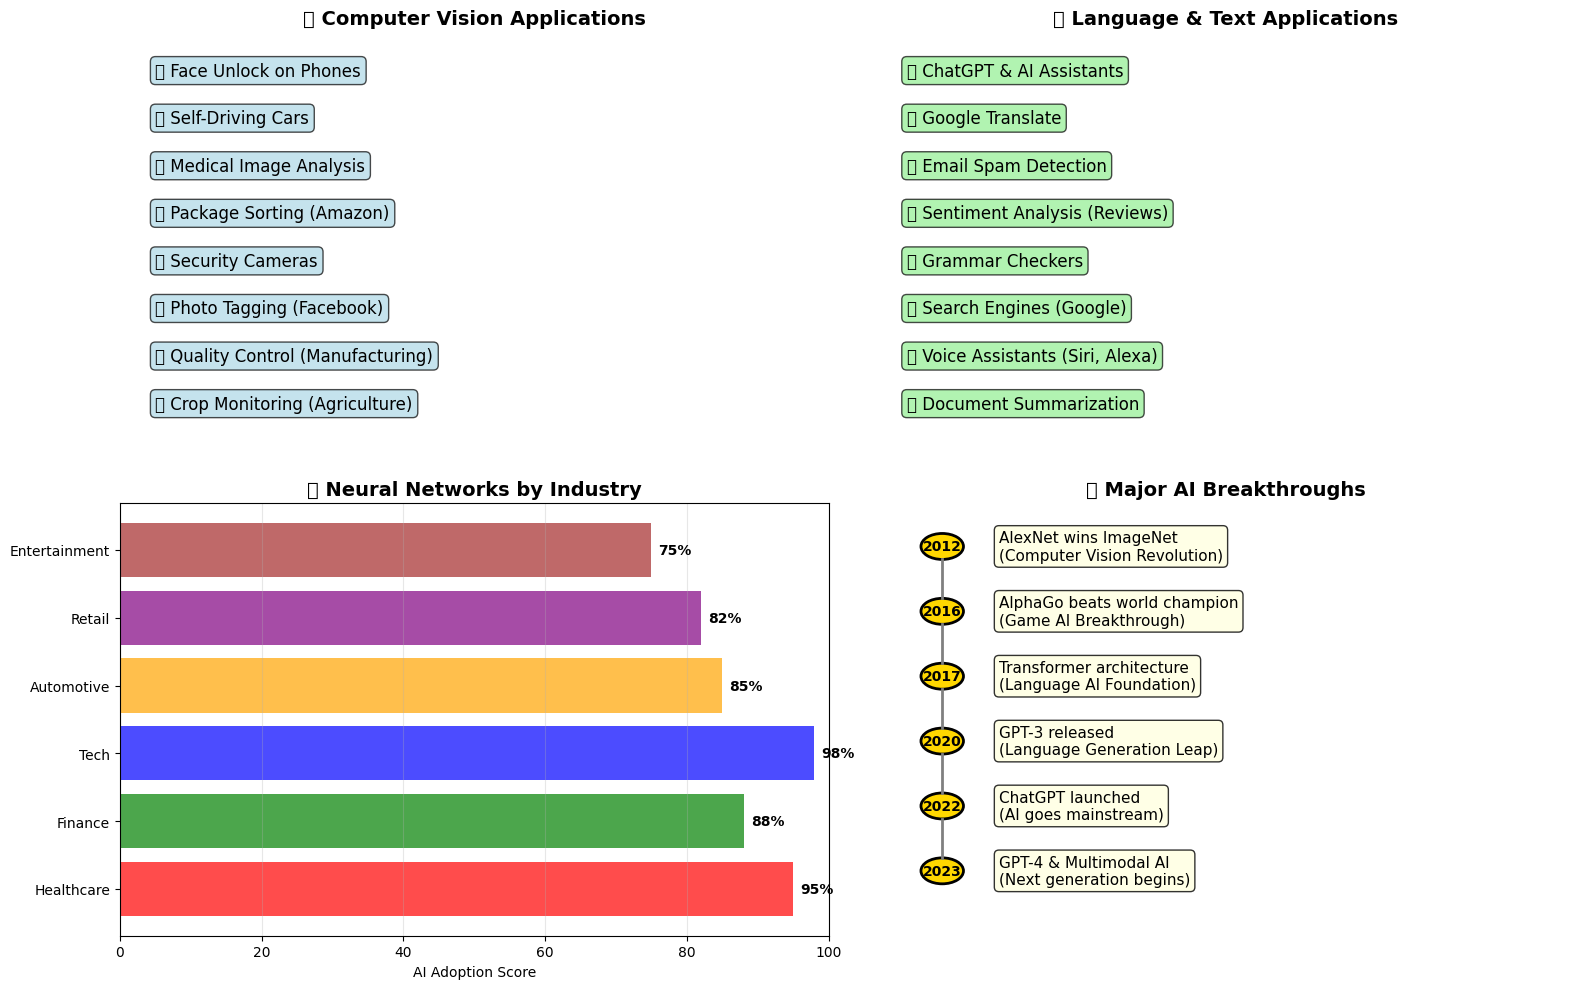

🌟 The Neural Network Revolution:
• From research labs to everyday apps in just a decade
• Touching every industry and aspect of modern life
• Democratizing AI capabilities for developers worldwide
• Creating entirely new job categories and opportunities


In [5]:
# Showcase real-world applications
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# 1. Computer Vision Applications
ax1.set_title("👁️ Computer Vision Applications", fontsize=14, fontweight="bold")
ax1.axis("off")

cv_applications = [
    "📱 Face Unlock on Phones",
    "🚗 Self-Driving Cars",
    "🏥 Medical Image Analysis",
    "📦 Package Sorting (Amazon)",
    "🛡️ Security Cameras",
    "📸 Photo Tagging (Facebook)",
    "🎯 Quality Control (Manufacturing)",
    "🌾 Crop Monitoring (Agriculture)",
]

for i, app in enumerate(cv_applications):
    y_pos = 0.9 - (i * 0.11)
    ax1.text(
        0.05,
        y_pos,
        app,
        transform=ax1.transAxes,
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7),
    )

# 2. Natural Language Processing
ax2.set_title("💬 Language & Text Applications", fontsize=14, fontweight="bold")
ax2.axis("off")

nlp_applications = [
    "🤖 ChatGPT & AI Assistants",
    "🔤 Google Translate",
    "📧 Email Spam Detection",
    "💭 Sentiment Analysis (Reviews)",
    "📝 Grammar Checkers",
    "🔍 Search Engines (Google)",
    "🎙️ Voice Assistants (Siri, Alexa)",
    "📚 Document Summarization",
]

for i, app in enumerate(nlp_applications):
    y_pos = 0.9 - (i * 0.11)
    ax2.text(
        0.05,
        y_pos,
        app,
        transform=ax2.transAxes,
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7),
    )

# 3. Industry Impact Chart
ax3.set_title("📈 Neural Networks by Industry", fontsize=14, fontweight="bold")

industries = ["Healthcare", "Finance", "Tech", "Automotive", "Retail", "Entertainment"]
impact_scores = [95, 88, 98, 85, 82, 75]  # Adoption/impact scores
colors = ["red", "green", "blue", "orange", "purple", "brown"]

bars = ax3.barh(industries, impact_scores, color=colors, alpha=0.7)
ax3.set_xlabel("AI Adoption Score")
ax3.set_xlim(0, 100)
ax3.grid(True, alpha=0.3, axis="x")

# Add value labels
for i, (bar, score) in enumerate(zip(bars, impact_scores)):
    ax3.text(
        score + 1,
        bar.get_y() + bar.get_height() / 2,
        f"{score}%",
        va="center",
        fontweight="bold",
    )

# 4. Success Stories Timeline
ax4.set_title("🏆 Major AI Breakthroughs", fontsize=14, fontweight="bold")
ax4.axis("off")

timeline_events = [
    ("2012", "AlexNet wins ImageNet\n(Computer Vision Revolution)"),
    ("2016", "AlphaGo beats world champion\n(Game AI Breakthrough)"),
    ("2017", "Transformer architecture\n(Language AI Foundation)"),
    ("2020", "GPT-3 released\n(Language Generation Leap)"),
    ("2022", "ChatGPT launched\n(AI goes mainstream)"),
    ("2023", "GPT-4 & Multimodal AI\n(Next generation begins)"),
]

for i, (year, event) in enumerate(timeline_events):
    y_pos = 0.9 - (i * 0.15)
    # Year circle
    circle = plt.Circle(
        (0.1, y_pos),
        0.03,
        transform=ax4.transAxes,
        facecolor="gold",
        edgecolor="black",
        linewidth=2,
    )
    ax4.add_patch(circle)
    ax4.text(
        0.1,
        y_pos,
        year,
        transform=ax4.transAxes,
        ha="center",
        va="center",
        fontsize=10,
        fontweight="bold",
    )

    # Event description
    ax4.text(
        0.18,
        y_pos,
        event,
        transform=ax4.transAxes,
        va="center",
        fontsize=11,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.8),
    )

    # Connecting line
    if i < len(timeline_events) - 1:
        ax4.plot(
            [0.1, 0.1],
            [y_pos - 0.03, y_pos - 0.12],
            transform=ax4.transAxes,
            color="gray",
            linewidth=2,
        )

plt.tight_layout()
plt.show()

print("🌟 The Neural Network Revolution:")
print("• From research labs to everyday apps in just a decade")
print("• Touching every industry and aspect of modern life")
print("• Democratizing AI capabilities for developers worldwide")
print("• Creating entirely new job categories and opportunities")

## 🚀 What's Next?

Now that you understand the theory behind neural networks, you're ready to build them!

### 📚 In the Next Notebook: [04. Neural Networks in PyTorch](04_neural_networks_in_pytorch.ipynb)

You'll learn to:

- **Build** your first neural network with PyTorch
- **Train** it on real data
- **Evaluate** its performance
- **Visualize** the learning process
- **Improve** the model step by step

### 🎯 Key Takeaways from This Notebook

✅ **Neural networks are universal function approximators** - they can learn almost any pattern!

✅ **Layers work together**: Input → Hidden (processing) → Output (prediction)

✅ **Neurons perform math**: Weighted sum + bias + activation function

✅ **Learning happens through backpropagation**: Adjust weights based on errors

✅ **Different architectures solve different problems**: Feedforward, CNN, RNN, Transformers

✅ **Real-world impact is massive**: From your smartphone to self-driving cars!

### 🤔 Test Your Understanding

Before moving on, can you answer these questions?

1. What are the three main components of a neuron's computation?
2. Why do we need activation functions? What would happen without them?
3. Which type of neural network would you use for analyzing customer reviews?
4. How does a neural network "learn" from its mistakes?

Ready to start coding? Let's build some neural networks! 🔥


## 📖 Additional Resources

### 🎥 Recommended Videos

- [3Blue1Brown: Neural Networks](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) - Beautiful visual explanations
- [Andrew Ng's Deep Learning Course](https://www.coursera.org/specializations/deep-learning) - Comprehensive and rigorous

### 📚 Further Reading

- [Deep Learning Book](https://www.deeplearningbook.org/) by Ian Goodfellow (Free online)
- [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/) by Michael Nielsen

### 🛠️ Interactive Tools

- [TensorFlow Playground](https://playground.tensorflow.org/) - Experiment with neural networks in your browser
- [Distill.pub](https://distill.pub/) - Interactive machine learning explanations

### 🧠 Advanced Topics (For Later)

- Batch Normalization
- Dropout and Regularization
- Advanced Optimizers (Adam, RMSprop)
- Transfer Learning
- Generative Adversarial Networks (GANs)
